# test page for lstm method.

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn

from lstm_data_util import generate_toy_data_for_lstm
from rnn_model import rnn_model

%load_ext autoreload
%autoreload 2

### steps
1. generate toy data for prediction
2. change f_horizon value to see results

In [11]:
def moving_f_horizons(f_horizons):
    '''
    Check the relationship between f_horizon and the behavior.
    Parameters must match.
    '''
    y_tests = []
    y_preds = []
    Losses = []
    for f_horizon in f_horizons:    
        X_batches, y_batches, X_test, y_test = generate_toy_data_for_lstm(num_periods = 120, f_horizon = f_horizon, samples = 10009)
        print(X_test.shape)
        print("f_horizon is %d." %f_horizon)
        losses, y_pred = rnn_model(X_batches, y_batches, X_test, y_test, cell="BasicRNNCell", 
                  learning_rate=0.001, epochs=500, print_every=100, 
                  inputs=1, outputs=1, hidden=100, num_periods=120)
        y_tests.append(y_test)
        y_preds.append(y_pred)
        Losses.append(losses)
        
    return Losses, y_tests, y_preds

length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 1.
0   MSE: 1916542.0
100   MSE: 12635.658
200   MSE: 8445.886
300   MSE: 5981.4287
400   MSE: 4691.451
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 2.
0   MSE: 1756573.4
100   MSE: 12407.786
200   MSE: 7469.7246
300   MSE: 4067.173
400   MSE: 1373.3232
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 3.
0   MSE: 2009468.5
100   MSE: 8781.354
200   MSE: 4916.759
300   MSE: 2390.0613
400   MSE: 707.7495
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 4.
0   MSE: 1310918.0
100   MSE: 10569.499
200   MSE: 4404.1416
300   MSE: 1736.9832
400   MSE: 587.00525
length of training data x :  (9960

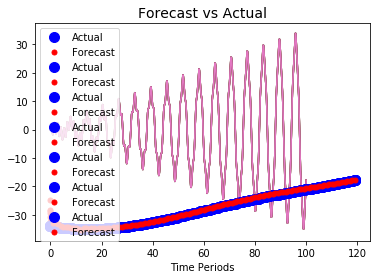

In [12]:
f_horizons = [1,2,3,4,5,8,10]
Losses, y_tests, y_preds = moving_f_horizons(f_horizons)

In [13]:
f_horizons = [1,2,3,4,5,8,10]

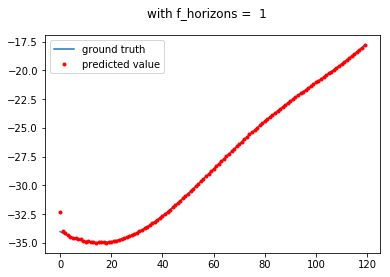

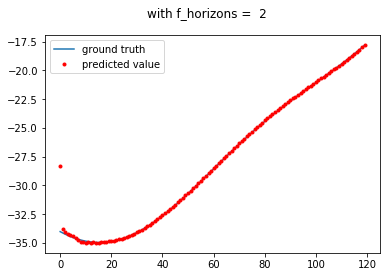

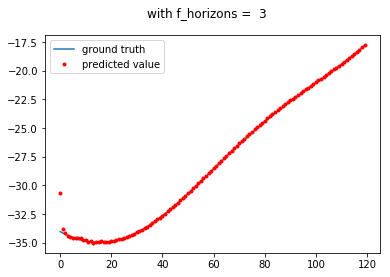

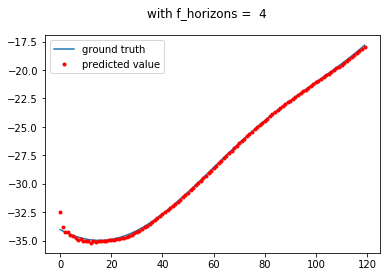

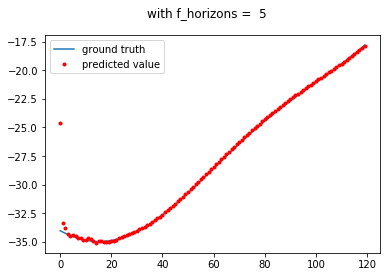

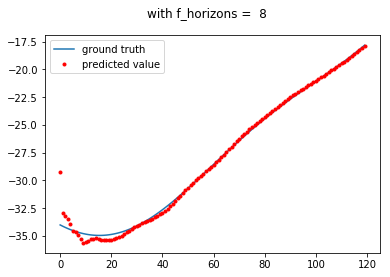

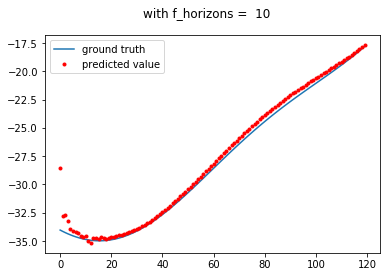

In [14]:
for i in range(len(Losses)):
    
    y_test = np.squeeze(y_tests[i])
    y_pred = np.squeeze(y_preds[i])
    
    fig, ax=plt.subplots(1, 1)
    
    x = range(len(y_test))
    
    f_horizon = f_horizons[i]
    fig.suptitle('with f_horizons =  %i' %(f_horizon));
      
    # p = plt.subplot(num)
    ax.plot(x, y_test, label="ground truth")
    ax.plot(x, y_pred, 'r.', label="predicted value")
    ax.legend()

# Results
- f_horizon 可以取不同的值，随着该值越来越大，也就是预测越来越远的未来，模型的表现就越差

# ChangeLog
- 20180414 v0